# Author

This jupyter notebook is written by Selma Jyothi Prakash as part of the capstone activity for the deep learning track, practioner level.

# Purpose
Documents the process of creating a fully-connected (dense) neural network for handwritten digit classification. The dataset used is the MNIST dataset available in keras.

The final model should be able to identify a digit correclty based on image file that has the handwritten digit.

# Libraries Imported

In [1]:
#Imports
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from keras.optimizers import SGD
from keras.optimizers import adam
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import sys

Using TensorFlow backend.


# Dataset

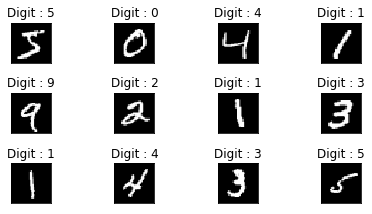

**Shape Of Dataset**
X - Training set shape :  (60000, 28, 28)
Y - Training set shape :  (60000,)
X - Test set shape :  (10000, 28, 28)
Y - Test set shape :  (10000,)
60000  train samples
10000  test samples

**Reshape Input**
X_train shape :  (60000, 784)
X_test shape  :  (10000, 784)

**One-hot encoded Output**
Y_train shape :  (60000, 10)
Y_test shape  :  (10000, 10)


In [2]:
# Load MNIST dataset
(Xtrn, Ytrn),(Xtest, Ytest) = mnist.load_data()

# Visualize data
for i in range(12):
    plt.subplot(4,4,i+1)
    plt.tight_layout()
    plt.imshow(Xtrn[i],cmap='gray', interpolation = 'none')
    plt.title("Digit : {}".format(Ytrn[i]))
    plt.xticks([])
    plt.yticks([])
#show plot
plt.show()

#Shape of Dataset
print('**Shape Of Dataset**')
print('X - Training set shape : ', Xtrn.shape)
print('Y - Training set shape : ', Ytrn.shape)
print('X - Test set shape : ', Xtest.shape)
print('Y - Test set shape : ', Ytest.shape)

print(Xtrn.shape[0], ' train samples')
print(Xtest.shape[0], ' test samples')

#Flatten input
print()
print("**Reshape Input**")
totpix = Xtrn.shape[1] * Xtrn.shape[2]
X_train = Xtrn.reshape(Xtrn.shape[0],totpix).astype('float32')
X_test = Xtest.reshape(Xtest.shape[0],totpix).astype('float32')


#Final Shape
print('X_train shape : ', X_train.shape)
print('X_test shape  : ', X_test.shape)

#One hot encode Output
print()
print("**One-hot encoded Output**")
Y_train = to_categorical(Ytrn)
Y_test  = to_categorical(Ytest)
print('Y_train shape : ', Y_train.shape)
print('Y_test shape  : ', Y_test.shape)

# Common Functions 
  1. Create Model
  2. Build Model
  3. Plot the validation accuracy and loss 
  4. Perform prediction on Test Data 

In [3]:
# Lists all common functions used in Task 1, Task 2 and Task 3

# Model
def mnist_model(no_layers = 1,no_nodes = 32,class_size = 10,learning_rate = 0.01, momentum = 0, activation = 'sigmoid', optimizer = 'sgd'):
    model = Sequential()  
    
    #print('activation - ',activation)
    #print('optimizer - ',optimizer)
    # Hidden Layer   
    model.add(Dense(no_nodes,input_dim = 784 ,activation=activation))
    if no_layers > 1:
        for i in range(2,no_layers+1):
            model.add(Dense(no_nodes,activation=activation))
            
    #Output Layer   
    model.add(Dense(class_size,activation='softmax'))     
    #Compile 
    sgd = SGD(learning_rate = learning_rate, momentum=0.0, nesterov=False)
    model.compile(loss = 'categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])  
    print()
   # print('**Model Summary**')
    model.summary()
    return model   


# Build model 
def fc_model(no_layers,no_nodes,class_size,cap_batch_size,cap_epochs,learning_rate,momentum = 0, activation = 'sigmoid', optimizer = 'sgd'):
            
    model = mnist_model(no_layers,no_nodes,class_size,learning_rate,momentum,activation,optimizer)
            
    print()
    print('**Model Training**')
    model_hist = model.fit(X_train,Y_train, 
          batch_size=cap_batch_size, epochs=cap_epochs,
          verbose=2,
          shuffle = True,
          validation_data=(X_test,Y_test))

    #Evaluate Model
    print()
    print('**Model Evaluation**')
    score = model.evaluate(X_test,Y_test,verbose=2)
    print("Test Loss : ",score[0])
    print("Test Accuracy : ",score[1])
    
    #Plot results
    plot_model(model_hist)
    
    #Predict using model
    model_predict(model)
            
    return model_hist  

# Plot Accuracy
def plot_model(model_hist):
    plt.plot(model_hist.history['accuracy'])
    plt.plot(model_hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Training', 'Testing'], loc='lower right')
    plt.show()
    
    plt.plot(model_hist.history['loss'])
    plt.plot(model_hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Training', 'Testing'], loc='lower right')    
    plt.show()
    
# Model Prediction on Test Data    
def model_predict(model):
    #Check predictions
    print()
    print('**Model Prediction**')
    predicted_classes = model.predict_classes(X_test)

    #Check predictions
    correct_idx = np.nonzero(predicted_classes == Ytest)[0]
    incorrect_idx = np.nonzero(predicted_classes != Ytest)[0]
    print(len(correct_idx), " Classified correctly")
    print(len(incorrect_idx), " Classified incorrectly")

# Part 1

Classify the digits using a fully connected neural network architecture

Fixed parameters for Task 1-3.
    - Sigmoid transfer function for hidden layers
    - Softmax activation function for the output layer
    - Categorical cross entropy as loss function
    - Stochastic Gradient Descent (SGD) as the optimization algorithm
 
Tunable parameters for Tasks 1-3.
    - Number of layers
    - Number of nodes in each layer
    - Number of training epochs to be run*
    - Batch size for each epoch*
    
*Training epochs is 5 and a fixed batch size is 128 for Task 1 and Task 2, cases 1, 3 and 4. Epochs can be changed for Task 2 - Case 2.

## Task 1 - Execute a simple, fully-connected, neural network architecture with a single hidden layer with 32 nodes.

## Hypothesis
This model should give a better accuracy than the initial pre-work model created with 8 nodes


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________

**Model Training**

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 1s - loss: 2.1388 - accuracy: 0.3629 - val_loss: 1.9788 - val_accuracy: 0.5457
Epoch 2/5
 - 1s - loss: 1.8573 - accuracy: 0.6156 - val_loss: 1.7271 - val_accuracy: 0.6700
Epoch 3/5
 - 1s - loss: 1.6106 - accuracy: 0.7136 - val_loss: 1.4873 - val_accuracy: 0.7558
Epoch 4/5
 - 1s - loss: 1.3839 -

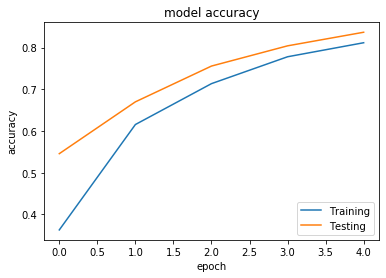

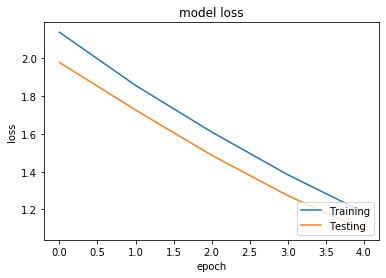


**Model Prediction**
8369  Classified correctly
1631  Classified incorrectly


In [4]:
# Task 1 
# Execute a simple, fully-connected, neural network architecture with a single hidden layer with 32 nodes.

no_layers = 2
no_nodes = 32
class_size = 10
cap_batch_size = 128
cap_epochs = 5
learning_rate = 0.01

model_hist = fc_model(no_layers,no_nodes,class_size,cap_batch_size,cap_epochs,learning_rate)


## Task 1 - Test Results 
Increasing the number of nodes in hidden layer from 8 to 32 increased accuracy of model by 10%

## Task 2 - Case 1  - Execute a simple, fully-connected, neural network architecture with a more hidden layers with 32 nodes.

**Task 2 - Case 1: Hypothesis**
 Expecting an increase in accuracy when more hidden layers are added


Number of Hidden Layers :  2

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________

**Model Training**
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 1s - loss: 2.1490 - accuracy: 0.3740 - val_loss: 1.9935 - val_accuracy: 0.5737
Epoch 2/5
 - 1s - loss: 1.8781 - accuracy: 0.6373 - val_loss: 1.7537 - val_accuracy: 0.7057
Epoch 3/5
 - 1s - loss: 1.6431 - accuracy: 0.7247 - val_loss: 1.5233 - val_accuracy: 0.7560
Epo

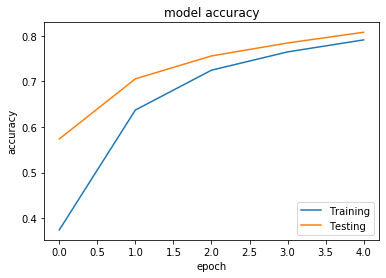

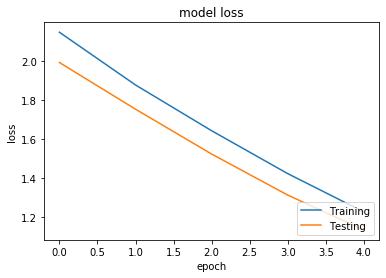


**Model Prediction**
8080  Classified correctly
1920  Classified incorrectly

Number of Hidden Layers :  3

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________

**Model Training**
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 2s - loss: 2.3019 - accuracy: 0.1249 - val_loss: 2.2751 

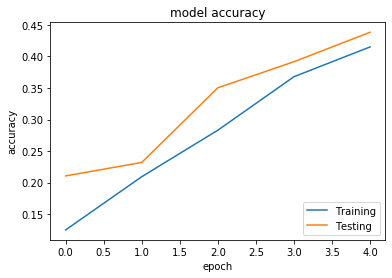

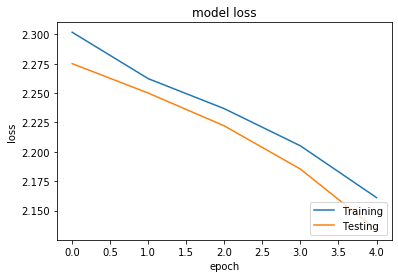


**Model Prediction**
4384  Classified correctly
5616  Classified incorrectly

Number of Hidden Layers :  4

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________

**Mode

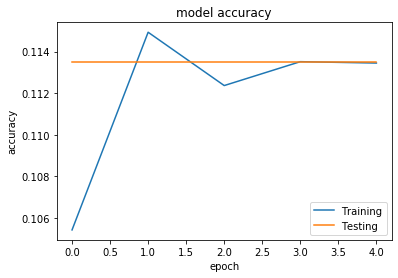

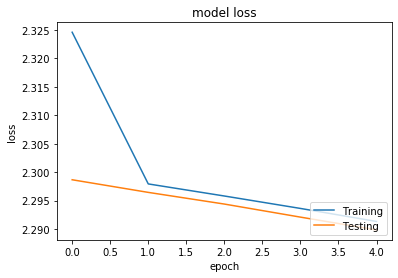


**Model Prediction**
1135  Classified correctly
8865  Classified incorrectly


In [5]:
# Task 2 - Case 1
# Different Number of Hidden Layers

no_layers = 2,3,4
no_nodes = 32
class_size = 10
cap_batch_size = 128
cap_epochs = 5
learning_rate = 0.01

for no_layers in range(2,5):
    print()
    print ("Number of Hidden Layers : ", no_layers)    
    model_hist = fc_model(no_layers,no_nodes,class_size,cap_batch_size,cap_epochs,learning_rate)


## Task 2 - Case 1 - Test Results
Verified the results from model with 2, 3 and 4 layers respectively. 
Noticed that increasing the number of layers decreases the accuracy of the model

## Task 2 - Case 2 - Execute a simple, fully-connected, neural network architecture with a 1 hidden layer with 32 nodes trained longer

**Task 2 - Case 2: Hypothesis**
Expecting better accuracy when model is trained longer.


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________

**Model Training**
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 1.4035 - accuracy: 0.6576 - val_loss: 0.9608 - val_accuracy: 0.8210
Epoch 2/10
 - 1s - loss: 0.8110 - accuracy: 0.8425 - val_loss: 0.6840 - val_accuracy: 0.8655
Epoch 3/10
 - 1s - loss: 0.6301 - accuracy: 0.8703 - val_loss: 0.5706 - val_accuracy: 0.8779
Epoch 4/10
 - 1s - loss: 0.5377 - accuracy: 0.8812 - val_loss: 0.4964 - val_accuracy: 0.8869
Epoch 5/10
 - 1s - loss: 0.4833 - accuracy: 0.8892 - val_loss: 0.4541

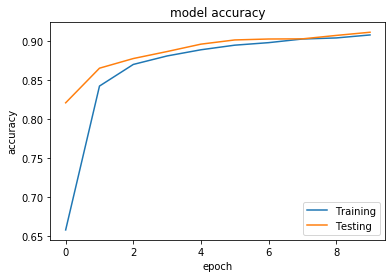

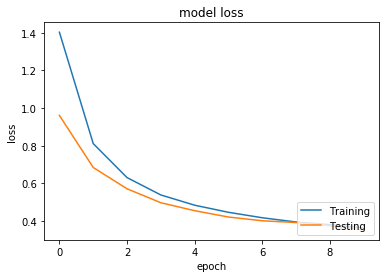


**Model Prediction**
9117  Classified correctly
883  Classified incorrectly


In [6]:
# Task 2 - Case 2
# Train for 10 epochs

no_layers = 1
no_nodes = 32
class_size = 10
cap_batch_size = 128    # Verified for 50,100,150
cap_epochs = 10         # Verified for 10,15,20
learning_rate = 0.01

model_hist = fc_model(no_layers,no_nodes,class_size,cap_batch_size,cap_epochs,learning_rate)


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________

**Model Training**
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 2s - loss: 1.3643 - accuracy: 0.6544 - val_loss: 0.9651 - val_accuracy: 0.8019
Epoch 2/30
 - 2s - loss: 0.8181 - accuracy: 0.8260 - val_loss: 0.6946 - val_accuracy: 0.8594
Epoch 3/30
 - 2s - loss: 0.6382 - accuracy: 0.8617 - val_loss: 0.5804 - val_accuracy: 0.8791
Epoch 4/30
 - 1s - loss: 0.5453 - accuracy: 0.8750 - val_loss: 0.5059 - val_accuracy: 0.8873
Epoch 5/30
 - 1s - loss: 0.4889 - accuracy: 0.8844 - val_loss: 0.4615

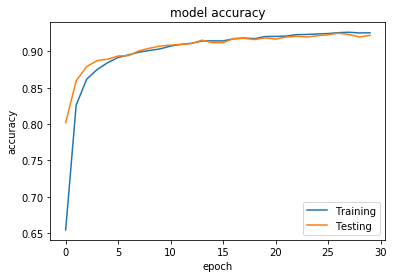

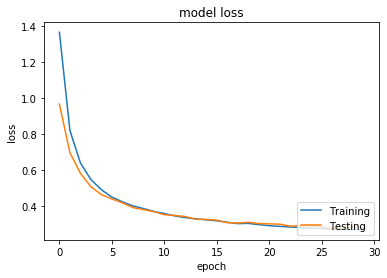


**Model Prediction**
9220  Classified correctly
780  Classified incorrectly


In [7]:
# Task 2 - Case 2
# Train for 30 epochs

no_layers = 1
no_nodes = 32
class_size = 10
cap_batch_size = 128    
cap_epochs = 30         
learning_rate = 0.01

model_hist = fc_model(no_layers,no_nodes,class_size,cap_batch_size,cap_epochs,learning_rate)


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________

**Model Training**
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 3s - loss: 1.0072 - accuracy: 0.7541 - val_loss: 0.6096 - val_accuracy: 0.8571
Epoch 2/50
 - 3s - loss: 0.5468 - accuracy: 0.8621 - val_loss: 0.4694 - val_accuracy: 0.8787
Epoch 3/50
 - 9s - loss: 0.4724 - accuracy: 0.8739 - val_loss: 0.4438 - val_accuracy: 0.8824
Epoch 4/50
 - 6s - loss: 0.4338 - accuracy: 0.8789 - val_loss: 0.4195 - val_accuracy: 0.8860
Epoch 5/50
 - 6s - loss: 0.4161 - accuracy: 0.8847 - val_loss: 0.3842

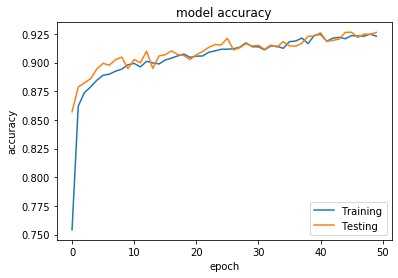

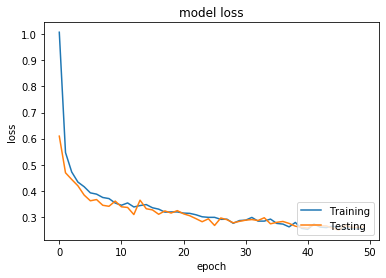


**Model Prediction**
9264  Classified correctly
736  Classified incorrectly


In [8]:
# Task 2 - Case 2
# Train for 100 epochs and see how it goes

no_layers = 1
no_nodes = 32
class_size = 10
cap_batch_size = 32    
cap_epochs = 50        
learning_rate = 0.01

model_hist = fc_model(no_layers,no_nodes,class_size,cap_batch_size,cap_epochs,learning_rate)


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_23 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________

**Model Training**
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 4s - loss: 1.3849 - accuracy: 0.6467 - val_loss: 0.9873 - val_accuracy: 0.7816
Epoch 2/100
 - 4s - loss: 0.8426 - accuracy: 0.8138 - val_loss: 0.7173 - val_accuracy: 0.8445
Epoch 3/100
 - 4s - loss: 0.6635 - accuracy: 0.8527 - val_loss: 0.5952 - val_accuracy: 0.8689
Epoch 4/100
 - 4s - loss: 0.5661 - accuracy: 0.8712 - val_loss: 0.5197 - val_accuracy: 0.8828
Epoch 5/100
 - 4s - loss: 0.5052 - accuracy: 0.8805 - val_loss: 0

 - 1s - loss: 0.1847 - accuracy: 0.9474 - val_loss: 0.2068 - val_accuracy: 0.9394
Epoch 81/100
 - 1s - loss: 0.1817 - accuracy: 0.9484 - val_loss: 0.2136 - val_accuracy: 0.9364
Epoch 82/100
 - 1s - loss: 0.1822 - accuracy: 0.9483 - val_loss: 0.1958 - val_accuracy: 0.9437
Epoch 83/100
 - 1s - loss: 0.1840 - accuracy: 0.9471 - val_loss: 0.2041 - val_accuracy: 0.9382
Epoch 84/100
 - 1s - loss: 0.1766 - accuracy: 0.9492 - val_loss: 0.2028 - val_accuracy: 0.9414
Epoch 85/100
 - 1s - loss: 0.1803 - accuracy: 0.9480 - val_loss: 0.2048 - val_accuracy: 0.9398
Epoch 86/100
 - 1s - loss: 0.1785 - accuracy: 0.9489 - val_loss: 0.1950 - val_accuracy: 0.9437
Epoch 87/100
 - 1s - loss: 0.1795 - accuracy: 0.9488 - val_loss: 0.1997 - val_accuracy: 0.9421
Epoch 88/100
 - 1s - loss: 0.1771 - accuracy: 0.9492 - val_loss: 0.1949 - val_accuracy: 0.9415
Epoch 89/100
 - 1s - loss: 0.1783 - accuracy: 0.9489 - val_loss: 0.2060 - val_accuracy: 0.9380
Epoch 90/100
 - 1s - loss: 0.1793 - accuracy: 0.9481 - val_loss

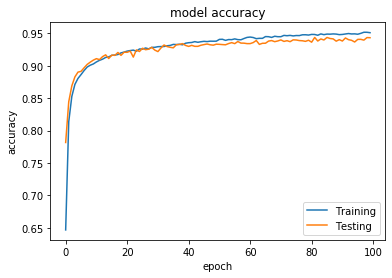

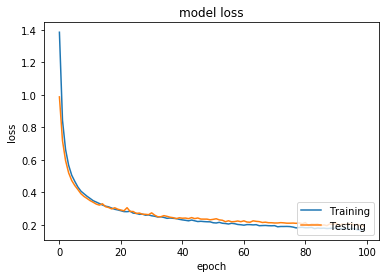


**Model Prediction**
9433  Classified correctly
567  Classified incorrectly


In [9]:
# Task 2 - Case 2
# Train for 100 epochs and see how it goes

no_layers = 1
no_nodes = 32
class_size = 10
cap_batch_size = 128    
cap_epochs = 100         
learning_rate = 0.01

model_hist = fc_model(no_layers,no_nodes,class_size,cap_batch_size,cap_epochs,learning_rate)

## Task 2 - Case 2 Test Results ##

Training longer definitely improves performance upto some extent.
When the epochs raised from 5 to 50, an improvement is noticed. However increasing accuracy beyond 50 does not improve the model accuracy significantly.
Reducing the batch size kept the accuracy same but more noise is detected

## Task 2 - Case 3 - Execute a simple, fully-connected, neural network architecture with a 1 hidden layer training on different number of nodes 

**Task 2 - Case 3 Hypothesis**
Expecting a better accuracy and shorter training time for wider networks


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________

**Model Training**
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 1s - loss: 1.1107 - accuracy: 0.7243 - val_loss: 0.7030 - val_accuracy: 0.8487
Epoch 2/5
 - 1s - loss: 0.6133 - accuracy: 0.8632 - val_loss: 0.5250 - val_accuracy: 0.8801
Epoch 3/5
 - 1s - loss: 0.4880 - accuracy: 0.8850 - val_loss: 0.4387 - val_accuracy: 0.8949
Epoch 4/5
 - 1s - loss: 0.4211 - accuracy: 0.8978 - val_loss: 0.3896 - val_accuracy: 0.9028
Epoch 5/5
 - 1s - loss: 0.3796 - accuracy: 0.9048 - val_loss: 0.3603 - va

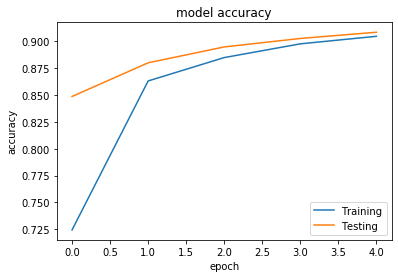

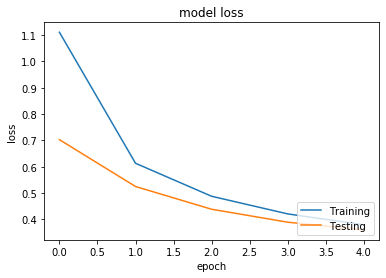


**Model Prediction**
9086  Classified correctly
914  Classified incorrectly

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 192)               150720    
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1930      
Total params: 152,650
Trainable params: 152,650
Non-trainable params: 0
_________________________________________________________________

**Model Training**
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 2s - loss: 0.9462 - accuracy: 0.7566 - val_loss: 0.5432 - val_accuracy: 0.8705
Epoch 2/5
 - 2s - loss: 0.4695 - accuracy: 0.8839 - val_loss: 0.3986 - val_accuracy: 0.8985
Epoch 3/5
 - 2s - loss: 0.3747 - accuracy: 0.9026 - val_loss: 0.3384 - val_accuracy: 0.9102
Epoch 4/5
 - 2s - loss: 0.3260 - accuracy: 0.9131 - val_loss: 0.3033 - val_accuracy: 

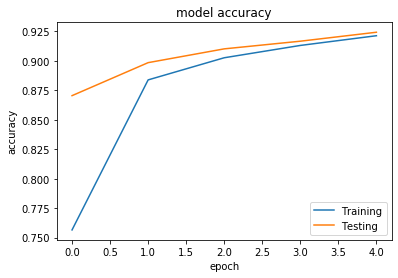

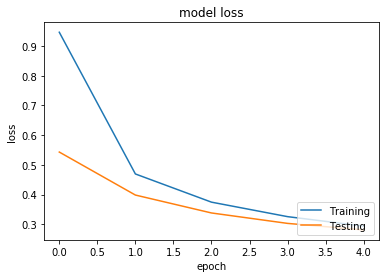


**Model Prediction**
9243  Classified correctly
757  Classified incorrectly

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 768)               602880    
_________________________________________________________________
dense_29 (Dense)             (None, 10)                7690      
Total params: 610,570
Trainable params: 610,570
Non-trainable params: 0
_________________________________________________________________

**Model Training**
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 4s - loss: 0.6302 - accuracy: 0.8364 - val_loss: 0.3618 - val_accuracy: 0.9096
Epoch 2/5
 - 5s - loss: 0.3263 - accuracy: 0.9136 - val_loss: 0.2864 - val_accuracy: 0.9255
Epoch 3/5
 - 5s - loss: 0.2670 - accuracy: 0.9285 - val_loss: 0.2503 - val_accuracy: 0.9311
Epoch 4/5
 - 5s - loss: 0.2325 - accuracy: 0.9374 - val_loss: 0.2305 - val_accuracy: 

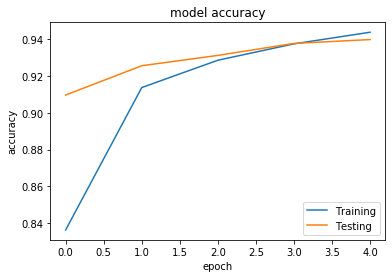

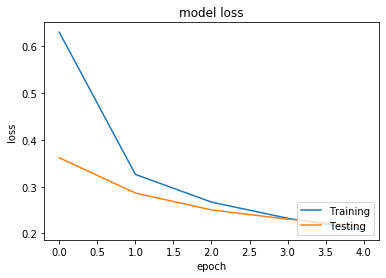


**Model Prediction**
9397  Classified correctly
603  Classified incorrectly

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 3840)              3014400   
_________________________________________________________________
dense_31 (Dense)             (None, 10)                38410     
Total params: 3,052,810
Trainable params: 3,052,810
Non-trainable params: 0
_________________________________________________________________

**Model Training**
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 18s - loss: 0.3895 - accuracy: 0.8935 - val_loss: 0.2364 - val_accuracy: 0.9365
Epoch 2/5
 - 16s - loss: 0.2012 - accuracy: 0.9462 - val_loss: 0.1911 - val_accuracy: 0.9469
Epoch 3/5
 - 17s - loss: 0.1521 - accuracy: 0.9618 - val_loss: 0.1716 - val_accuracy: 0.9522
Epoch 4/5
 - 16s - loss: 0.1212 - accuracy: 0.9711 - val_loss: 0.1559 - val_ac

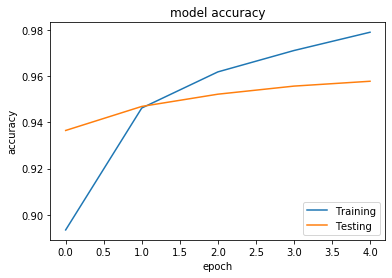

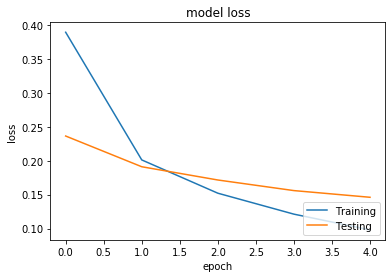


**Model Prediction**
9578  Classified correctly
422  Classified incorrectly


In [10]:
# Task 2 - Case 3
# Executing for number of nodes = 64, 192, 768, 3840)
no_layers = 1
no_nodes = 32
class_size = 10
cap_batch_size = 128
cap_epochs = 5
learning_rate = 0.01

for i in range(2,6):
    no_nodes = no_nodes * i
    model_hist = fc_model(no_layers,no_nodes,class_size,cap_batch_size,cap_epochs,learning_rate)

## Task 2 - Case 3 - Results ##
Training on wider networks improved the accuracy significantly

    |No of Nodes |Train          | Val         | Classified  | Classified  |
    |            |Accuracy       | Accuracy    | Correctly   | Incorrectly |
    |------------|---------------|-------------|-------------|-------------|
    | 64         |  90.18        |   90.82     |  9082       | 918         |
    | 192        |  92.12        |   92.43     |  9243       | 757         |
    | 768        |  94.35        |   93.88     |  9388       | 612         |
    | 3840       |  97.84        |   95.74     |  9575       | 425         |
 

## Task 2 - Case 4 - Execute a simple, fully-connected, neural network architecture with change by adding more nodes and more layers

**Task 2 - Case 4 - Hypothesis**
Expecting better accuracy with more nodes. Adding more layers may not give mush improvement in accuracy


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_33 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_34 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________

**Model Training**
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 3s - loss: 1.7947 - accuracy: 0.6234 - val_loss: 1.3313 - val_accuracy: 0.7753
Epoch 2/5
 - 3s - loss: 1.0556 - accuracy: 0.8188 - val_loss: 0.8214 - val_accuracy: 0.8629
Epoch 3/5
 - 3s - loss: 0.7078 - accuracy: 0.8657 - val_loss: 0.5938 - val_accuracy: 0.8827
Epoch 4/5
 - 3s - loss: 0.5425

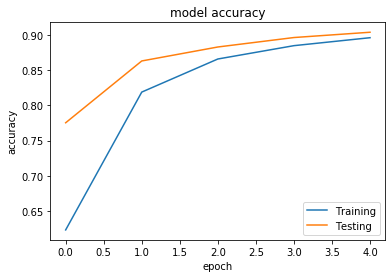

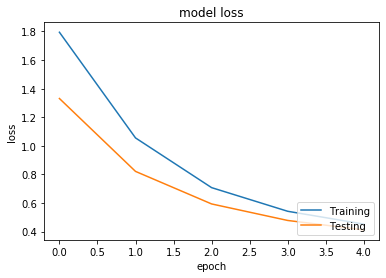


**Model Prediction**
9036  Classified correctly
964  Classified incorrectly


In [11]:
# Task 2 - Case 4
# 2 layers with 256 nodes

no_layers = 2
no_nodes = 256
class_size = 10
cap_batch_size = 128
cap_epochs = 5
learning_rate = 0.01

model_hist = fc_model(no_layers,no_nodes,class_size,cap_batch_size,cap_epochs,learning_rate)


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_36 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_37 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_38 (Dense)             (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________

**Model Training**
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 2s - loss: 2.2883 - accuracy: 0.1505 - val_loss: 2.2622 - val_accuracy: 0.2785
Epoch 2/5
 - 2s - loss: 2.2394 - accuracy: 0.2892 - val_loss: 2.2113 - val_accuracy:

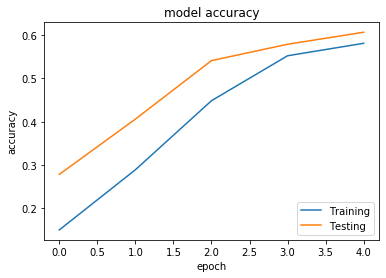

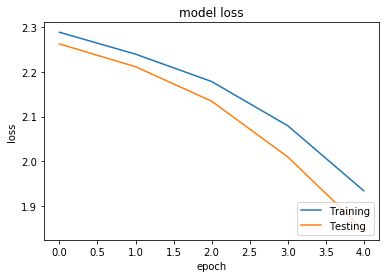


**Model Prediction**
6063  Classified correctly
3937  Classified incorrectly


In [12]:
# Task 2 - Case 4
# 2 layers with 256 nodes

no_layers = 3
no_nodes = 64
class_size = 10
cap_batch_size = 128
cap_epochs = 5
learning_rate = 0.01

model_hist = fc_model(no_layers,no_nodes,class_size,cap_batch_size,cap_epochs,learning_rate)

## Task 2 - Case 4 - Results ##
With 2 layers the results are similar to Task 1.
As expected, when the number of layers are increased beyond 2, the model performance went down drastically.

## Task 3  - - How to improve the models  in task 1 and task 2 built above without really changing anything related to the kinds of layers, activations, optimization algorithms, etc

**Task 3 Hypothesis**
Adjusting the learning rate and number of nodes should improve the accuracy


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_40 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________

**Model Training**
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 1s - loss: 1.1388 - accuracy: 0.7080 - val_loss: 0.6969 - val_accuracy: 0.8489
Epoch 2/5
 - 1s - loss: 0.6044 - accuracy: 0.8599 - val_loss: 0.5040 - val_accuracy: 0.8860
Epoch 3/5
 - 1s - loss: 0.4773 - accuracy: 0.8855 - val_loss: 0.4318 - val_accuracy: 0.8949
Epoch 4/5
 - 2s - loss: 0.4165 - accuracy: 0.8969 - val_loss: 0.3838 - val_accuracy: 0.9039
Epoch 5/5
 - 2s - loss: 0.3770 - accuracy: 0.9045 - val_loss: 0.3592 - v

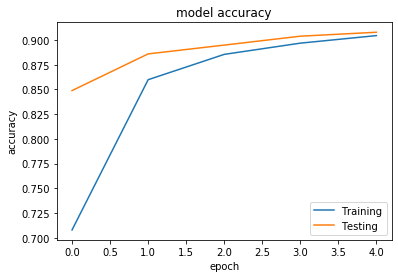

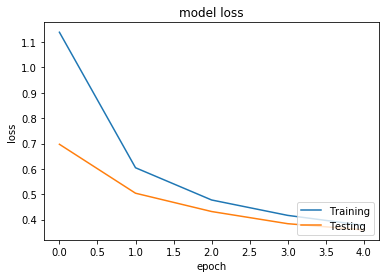


**Model Prediction**
9079  Classified correctly
921  Classified incorrectly


In [13]:
# Task 3 
# improve the models built in Task 1 and Task 2
# Increased nodes to 64 and learning rate to 0.5

no_layers = 1
no_nodes = 64
class_size = 10
cap_batch_size = 128
cap_epochs = 5
learning_rate = 0.5

model_hist = fc_model(no_layers,no_nodes,class_size,cap_batch_size,cap_epochs,learning_rate)


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 700)               549500    
_________________________________________________________________
dense_42 (Dense)             (None, 10)                7010      
Total params: 556,510
Trainable params: 556,510
Non-trainable params: 0
_________________________________________________________________

**Model Training**
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 4s - loss: 0.6394 - accuracy: 0.8345 - val_loss: 0.3693 - val_accuracy: 0.9061
Epoch 2/5
 - 4s - loss: 0.3330 - accuracy: 0.9119 - val_loss: 0.2880 - val_accuracy: 0.9239
Epoch 3/5
 - 5s - loss: 0.2717 - accuracy: 0.9272 - val_loss: 0.2530 - val_accuracy: 0.9321
Epoch 4/5
 - 5s - loss: 0.2367 - accuracy: 0.9355 - val_loss: 0.2341 - val_accuracy: 0.9356
Epoch 5/5
 - 4s - loss: 0.2118 - accuracy: 0.9439 - val_loss: 0.2157 -

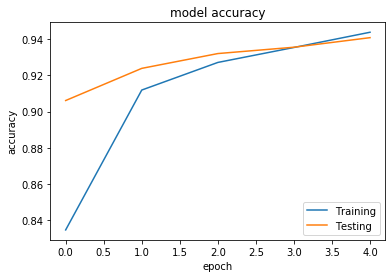

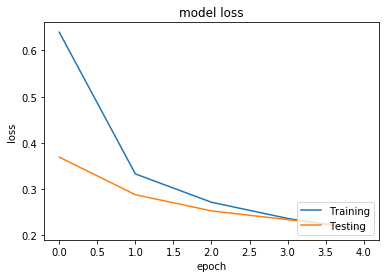


**Model Prediction**
9409  Classified correctly
591  Classified incorrectly


In [14]:
# Task 3 
# improve the models built in Task 1 and Task 2
# Increased nodes to 64 and learning rate to 0.5

no_layers = 1
no_nodes = 700
class_size = 10
cap_batch_size = 128
cap_epochs = 5
learning_rate = 0.5

model_hist = fc_model(no_layers,no_nodes,class_size,cap_batch_size,cap_epochs,learning_rate)

## Task 3 - Test Results
Accuracy of model improved for wider network with optimum learning rate. 


## Task 4 - Change any parameter/architecture to improve the quality metrics.

**Task 4 - Hypothesis**
Changing the activation and optimizer should be able to give an improvement


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_44 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________

**Model Training**
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
 - 4s - loss: 0.5477 - accuracy: 0.8533 - val_loss: 0.3595 - val_accuracy: 0.9056
Epoch 2/15
 - 4s - loss: 0.3266 - accuracy: 0.9070 - val_loss: 0.3207 - val_accuracy: 0.9081
Epoch 3/15
 - 3s - loss: 0.2936 - accuracy: 0.9148 - val_loss: 0.2862 - val_accuracy: 0.9219
Epoch 4/15
 - 3s - loss: 0.2732 - accuracy: 0.9199 - val_loss: 0.2606 - val_accuracy: 0.9220
Epoch 5/15
 - 3s - loss: 0.2603 - accuracy: 0.9235 - val_loss: 0.2

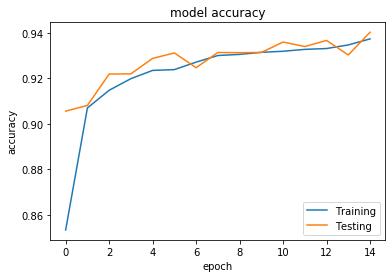

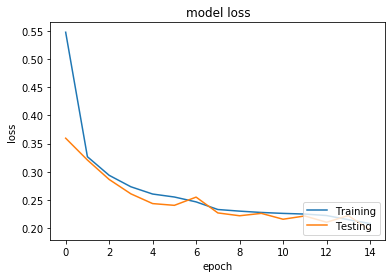


**Model Prediction**
9403  Classified correctly
597  Classified incorrectly


In [15]:
# Task 4 - sigmoid/adam
# change any parameter/architecture to improve the quality metrics.

no_layers = 1
no_nodes = 128
class_size = 10
cap_batch_size = 64
cap_epochs = 15
learning_rate = 0.05

model_hist = fc_model(no_layers,no_nodes,class_size,cap_batch_size,cap_epochs,learning_rate,optimizer='adam')

In [16]:
# Normalize data before calling relu function
X_train = X_train/255
X_test = X_test/255


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_46 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________

**Model Training**
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.3067 - accuracy: 0.9133 - val_loss: 0.1710 - val_accuracy: 0.9495
Epoch 2/10
 - 3s - loss: 0.1371 - accuracy: 0.9607 - val_loss: 0.1192 - val_accuracy: 0.9649
Epoch 3/10
 - 3s - loss: 0.0951 - accuracy: 0.9722 - val_loss: 0.0893 - val_accuracy: 0.9732
Epoch 4/10
 - 3s - loss: 0.0726 - accuracy: 0.9783 - val_loss: 0.0933 - val_accuracy: 0.9727
Epoch 5/10
 - 3s - loss: 0.0568 - accuracy: 0.9829 - val_loss: 0.0

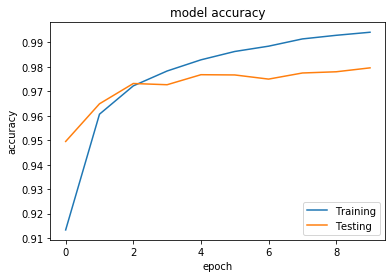

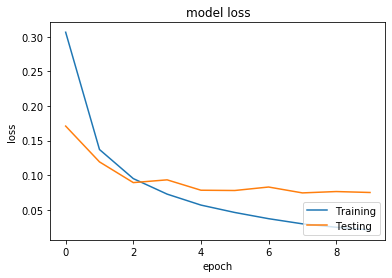


**Model Prediction**
9796  Classified correctly
204  Classified incorrectly


In [17]:
# Task 4 - relu/adam
# change any parameter/architecture to improve the quality metrics.

no_layers = 1
no_nodes = 128
class_size = 10
cap_batch_size = 64
cap_epochs = 10
learning_rate = 0.05

model_hist = fc_model(no_layers,no_nodes,class_size,cap_batch_size,cap_epochs,learning_rate,activation = 'relu', optimizer='adam')

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 0.3196 - accuracy: 0.9112 - val_loss: 0.1706 - val_accuracy: 0.9484
Epoch 2/10
 - 3s - loss: 0.1430 - accuracy: 0.9590 - val_loss: 0.1194 - val_accuracy: 0.9638
Epoch 3/10
 - 3s - loss: 0.0996 - accuracy: 0.9710 - val_loss: 0.0922 - val_accuracy: 0.9713
Epoch 4/10
 - 3s - loss: 0.0739 - accuracy: 0.9786 - val_loss: 0.0808 - val_accuracy: 0.9745
Epoch 5/10
 - 3s - loss: 0.0582 - accuracy: 0.9829 - val_loss: 0.0774 - val_accuracy: 0.9760
Epoch 6/10
 - 3s - loss: 0.0470 - accuracy: 0.9867 - val_loss: 0.0697 - val_accuracy: 0.9794
Epoch 7/10
 - 2s - loss: 0.0378 - accuracy: 0.9895 - val_loss: 0.0732 - val_accuracy: 0.9776
Epoch 8/10
 - 3s - loss: 0.0312 - accuracy: 0.9910 - val_loss: 0.0747 - val_accuracy: 0.9755
Epoch 9/10
 - 3s - loss: 0.0260 - accuracy: 0.9925 - val_loss: 0.0650 - val_accuracy: 0.9796
Epoch 10/10
 - 2s - loss: 0.0210 - accuracy: 0.9948 - val_loss: 0.0725 - val_accuracy: 0.9777

**Model Evaluation

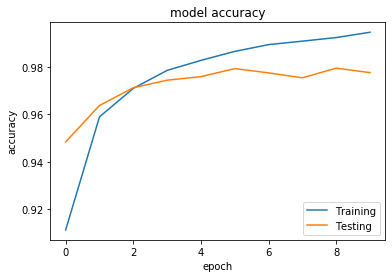

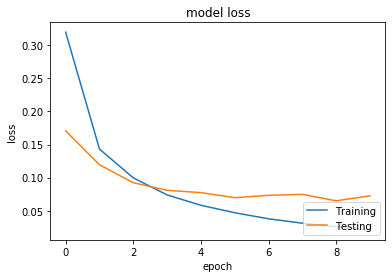


**Model Prediction**
9777  Classified correctly
223  Classified incorrectly


In [18]:
# Task 4 - relu
#change any parameter/architecture to improve the quality metrics.

class_size = 10
batch_size = 128
epochs = 10
learning_rate = 0.05

model = Sequential()    
# Hidden Layer
model.add(Dense(200,input_dim = 784,activation='relu'))  
model.add(Dropout(200))
model.add(Dense(class_size,activation='softmax'))     

#Compile 
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])  

#Train the model
model_hist = model.fit(X_train,Y_train, 
          batch_size=batch_size, epochs=epochs,
          verbose=2,
          validation_data=(X_test,Y_test))

#Evaluate Model
print()
print('**Model Evaluation**')
score = model.evaluate(X_test,Y_test,verbose=2)
print("Test Loss : ",score[0])
print("Test Accuracy : ",score[1])

# Model Summary
print()
model.summary()

#Plot results
plot_model(model_hist)
    
#Predict using model
model_predict(model)

## Task 4 - Test Results
 - Activation impacts the accuracy based on the training data. 
 - Normalization of data has impact on the accuracy from relu activation.
 - Dropout slightly reduced validation loss. But no great improvement.

## Task 5: discuss part1 vs part2

Part 1,Fully connected network with less computation requirement. However getting an accuracy which is close to CNN is difficult. The difference in accuracy in task 1 evidently suggests that CNN has a better advantage.
Both models performed well when the architecture was changed from Sigmoid to Relu. CNN was able to achieve an accuracy of 99% without much effort, where as Fully Connected network needed longer training and a wider model to get these results.


## Task 6: discuss part1 vs part2

Training model with 1/100th of the data and repeat Tasks 1-5. This task is done in 20200416_Team6_Part1_swap.ipynb


# Additional Credit - 3

Randomly scramble 10% of the labels of the train set, and train a new model to learn from mislabeled dataset. This is a very practical scenario as well annotated datasets can be time-consuming and expensive to collect, lending increased interest to larger but noisy datasets that are more easily obtained. You need to explore network architectures that are capable of good performance on corrupted data. 

**Additional Credit - 3 - Hypothesis**
Scrambling the data will tend to reduce the training and validation accuracy.

In [19]:
# Scramble 10% of Traning data labels.

def scramble_data(y,pct):
    y_shape = y.shape[0];
    y_scramble_size = int(y_shape * pct / 100)
    
    y_1 = y[:(y_shape - y_scramble_size)]
    y_2 = y[:y_scramble_size]
    
    np.random.shuffle(y_2)
    
    y1 = np.append(y_1, y_2, axis = 0)
    return y1

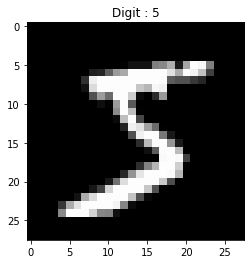

60000  train samples
10000  test samples
Number of train labels scrambled  5412


In [20]:
# Load MNIST dataset
(Xtrn, Ytrn),(Xtest, Ytest) = mnist.load_data()

# Visualize data
plt.imshow(Xtrn[0],cmap='gray', interpolation = 'none')
plt.title("Digit : {}".format(Ytrn[0]))
plt.show()

print(Xtrn.shape[0], ' train samples')
print(Xtest.shape[0], ' test samples')

#Flatten input
totpix = Xtrn.shape[1] * Xtrn.shape[2]
X_train = Xtrn.reshape(Xtrn.shape[0],totpix).astype('float32')
X_test = Xtest.reshape(Xtest.shape[0],totpix).astype('float32')

#Normalize Input
X_train = X_train / 255
X_test  = X_test / 255

#One hot encode Output
Y_train = to_categorical(Ytrn)
Y_test  = to_categorical(Ytest)

#Scramble Labels
scramble_y_train = scramble_data(Y_train,10)

scramble_ctr = 0
for i in range(Y_train.shape[0]):
    if not np.array_equal(Y_train[i], scramble_y_train[i]):
        scramble_ctr += 1
print ("Number of train labels scrambled ", scramble_ctr)


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_50 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________

**Model Training**
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
 - 3s - loss: 1.8881 - accuracy: 0.5609 - val_loss: 1.4074 - val_accuracy: 0.7840
Epoch 2/15
 - 2s - loss: 1.3258 - accuracy: 0.7280 - val_loss: 0.9562 - val_accuracy: 0.8306
Epoch 3/15
 - 2s - loss: 1.0963 - accuracy: 0.7632 - val_loss: 0.7573 - val_accuracy: 0.8571
Epoch 4/15
 - 3s - loss: 1.0005 - accuracy: 0.7786 - val_loss: 0.6557 - val_accuracy: 0.8673
Epoch 5/15
 - 3s - loss: 0.9515 - accuracy: 0.7883 - val_loss: 0.5

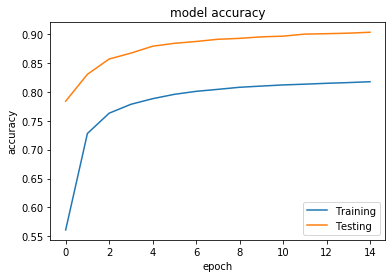

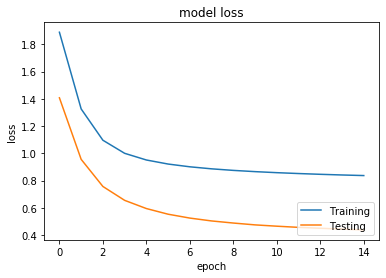


**Model Prediction**
9035  Classified correctly
965  Classified incorrectly


In [21]:
no_layers = 1
no_nodes = 128
class_size = 10
cap_batch_size = 64
cap_epochs = 15
learning_rate = 0.5

model_hist = fc_model(no_layers,no_nodes,class_size,cap_batch_size,cap_epochs,learning_rate,activation = 'sigmoid',optimizer='sgd')


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_52 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________

**Model Training**
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 3s - loss: 0.7949 - accuracy: 0.8321 - val_loss: 0.2791 - val_accuracy: 0.9522
Epoch 2/20
 - 3s - loss: 0.6584 - accuracy: 0.8721 - val_loss: 0.2491 - val_accuracy: 0.9624
Epoch 3/20
 - 3s - loss: 0.6189 - accuracy: 0.8818 - val_loss: 0.2095 - val_accuracy: 0.9692
Epoch 4/20
 - 3s - loss: 0.5923 - accuracy: 0.8870 - val_loss: 0.2119 - val_accuracy: 0.9709
Epoch 5/20
 - 3s - loss: 0.5736 - accuracy: 0.8900 - val_loss: 0.1

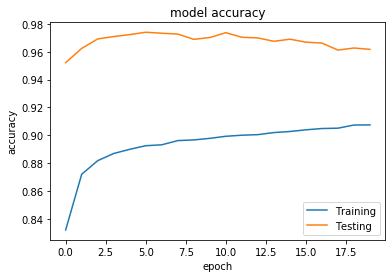

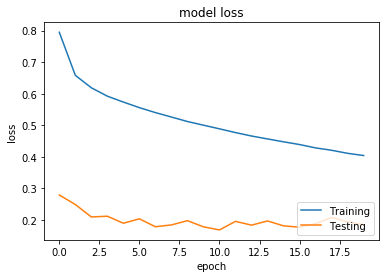


**Model Prediction**
9617  Classified correctly
383  Classified incorrectly


In [22]:
no_layers = 1
no_nodes = 128
class_size = 10
cap_batch_size = 64
cap_epochs = 20
learning_rate = 0.5

model_hist = fc_model(no_layers,no_nodes,class_size,cap_batch_size,cap_epochs,learning_rate,activation = 'relu',optimizer='adam')

# Additional Credit - 3 - Test Results
Training accuracy is around 10% less that validation accuracy when the data is scrambled.
Again as expected Relu performed at 94 - 97% (similar to network trained with unscrambled Data)

# Additional Credit 1 

Explore how well or badly your network behaves with obscured images.

a. Take a square a quarter the size of the MNIST images (14x14) and place it randomly over the test set of the dataset images.  How well does the network you trained work now? You may test the results using all the models you trained or only the best one.
b. Now train a new network but this time with train set obscured by the a 14x14 square as well.  How well can you do with the image if only part of it is seen.  What’s the best architecture for a NN that does well in this case?

**Additional Credit - 1 - Hypothesis**
Obscured images in test set will reduce the test set accuracy
Obscured images in training and test set should work almost with same accuracy.

In [23]:
def obscure_image(x,image_size):
    
    img_pad = np.zeros((image_size,image_size))
    
    for i in x:
        x[i,:image_size,:image_size] = img_pad
    #print(x.shape)
    
    return x

# Model with Obscured training data real test data

**Hypothesis** 
Validation accuracy will be affected to some extent. but not fully.

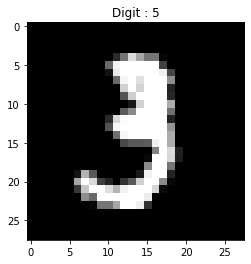

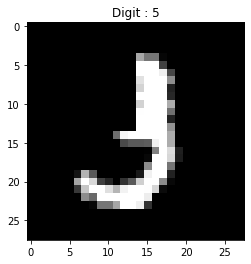

(60000, 28, 28)  train samples
(10000, 28, 28)  test samples


In [24]:
# Load MNIST dataset
(Xtrn, Ytrn),(Xtest, Ytest) = mnist.load_data()

# Visualize data
plt.imshow(Xtrn[10],cmap='gray', interpolation = 'none')
plt.title("Digit : {}".format(Ytrn[0]))
plt.show()

Xtrn = obscure_image(Xtrn,14)

# After obscure
plt.imshow(Xtrn[10],cmap='gray', interpolation = 'none')
plt.title("Digit : {}".format(Ytrn[0]))
plt.show()

print(Xtrn.shape, ' train samples')
print(Xtest.shape, ' test samples')

#Flatten input
totpix = Xtrn.shape[1] * Xtrn.shape[2]
X_train = Xtrn.reshape(Xtrn.shape[0],totpix).astype('float32')
X_test = Xtest.reshape(Xtest.shape[0],totpix).astype('float32')

#Normalize Input
X_train = X_train / 255
X_test  = X_test / 255

#One hot encode Output
Y_train = to_categorical(Ytrn)
Y_test  = to_categorical(Ytest)


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_54 (Dense)             (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________

**Model Training**
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 3s - loss: 0.3176 - accuracy: 0.9129 - val_loss: 0.1620 - val_accuracy: 0.9536
Epoch 2/5
 - 3s - loss: 0.1381 - accuracy: 0.9609 - val_loss: 0.1132 - val_accuracy: 0.9667
Epoch 3/5
 - 2s - loss: 0.0969 - accuracy: 0.9721 - val_loss: 0.0991 - val_accuracy: 0.9715
Epoch 4/5
 - 2s - loss: 0.0728 - accuracy: 0.9790 - val_loss: 0.0818 - val_accuracy: 0.9755
Epoch 5/5
 - 2s - loss: 0.0577 - accuracy: 0.9835 - val_loss: 0.0790 -

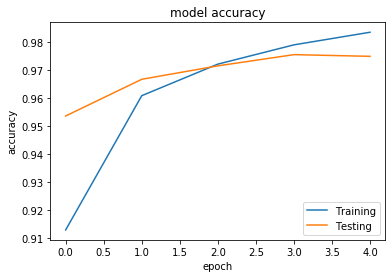

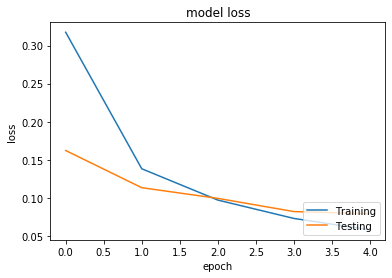


**Model Prediction**
9749  Classified correctly
251  Classified incorrectly


In [25]:
# Model with obscured training Data
no_layers = 1
no_nodes = 200
class_size = 10
cap_batch_size = 128
cap_epochs = 5
learning_rate = 0.5

model_hist = fc_model(no_layers,no_nodes,class_size,cap_batch_size,cap_epochs,learning_rate,activation = 'relu',optimizer='adam')

# Model with Obscured training data and test data

**Hypothesis** 
Validation accuracy will be affected.

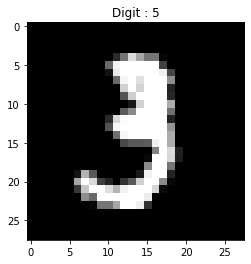

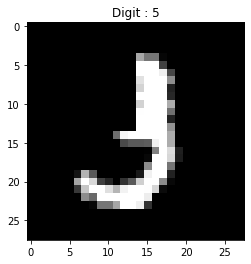

(60000, 28, 28)  train samples
(10000, 28, 28)  test samples


In [26]:
# Load MNIST dataset
(Xtrn, Ytrn),(Xtest, Ytest) = mnist.load_data()

# Visualize data
plt.imshow(Xtrn[10],cmap='gray', interpolation = 'none')
plt.title("Digit : {}".format(Ytrn[0]))
plt.show()

Xtrn = obscure_image(Xtrn,14)
Xtest = obscure_image(Xtest,14)

# After obscure
plt.imshow(Xtrn[10],cmap='gray', interpolation = 'none')
plt.title("Digit : {}".format(Ytrn[0]))
plt.show()

print(Xtrn.shape, ' train samples')
print(Xtest.shape, ' test samples')

#Flatten input
totpix = Xtrn.shape[1] * Xtrn.shape[2]
X_train = Xtrn.reshape(Xtrn.shape[0],totpix).astype('float32')
X_test = Xtest.reshape(Xtest.shape[0],totpix).astype('float32')

#Normalize Input
X_train = X_train / 255
X_test  = X_test / 255

#One hot encode Output
Y_train = to_categorical(Ytrn)
Y_test  = to_categorical(Ytest)


Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_56 (Dense)             (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________

**Model Training**
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 3s - loss: 0.3184 - accuracy: 0.9112 - val_loss: 0.1781 - val_accuracy: 0.9486
Epoch 2/5
 - 3s - loss: 0.1435 - accuracy: 0.9587 - val_loss: 0.1230 - val_accuracy: 0.9627
Epoch 3/5
 - 3s - loss: 0.0979 - accuracy: 0.9718 - val_loss: 0.0945 - val_accuracy: 0.9712
Epoch 4/5
 - 3s - loss: 0.0732 - accuracy: 0.9790 - val_loss: 0.0887 - val_accuracy: 0.9725
Epoch 5/5
 - 3s - loss: 0.0578 - accuracy: 0.9836 - val_loss: 0.0832 -

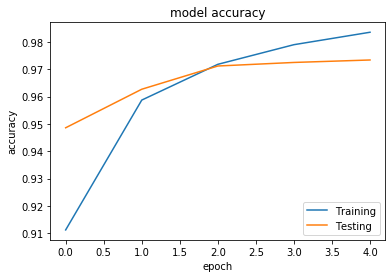

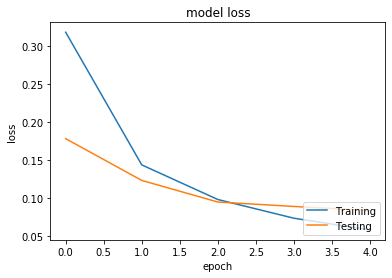


**Model Prediction**
9734  Classified correctly
266  Classified incorrectly


In [27]:
# Model with obscured training Data
no_layers = 1
no_nodes = 200
class_size = 10
cap_batch_size = 128
cap_epochs = 5
learning_rate = 0.5

model_hist = fc_model(no_layers,no_nodes,class_size,cap_batch_size,cap_epochs,learning_rate,activation = 'relu',optimizer='adam')

# Extra Credit - 1 - Test Results

Model with obscured training Data and real test data worked comparatively good with accuracy 97% when used with Relu/Adam trained for 5 epochs.

Model trained with obscured training data performed well with obsured test data. Got accuracy of 97% when used with Relu/Adam trained for 5 epochs.
